# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

In [245]:
# 색상 전체 명단 수집
colorlist = {}
colorlist.update(colors.CSS4_COLORS)

# 색상 이름과 코드로 분리해서 관리
colornames = []
colorcodes = []
for name, color in colorlist.items():
    colornames.append(name)
    colorcodes.append(color)

In [246]:
colornames

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


In [3]:
feature

array([[-2.78158782,  6.13851704],
       [-5.79072687,  3.00770345],
       [-8.85288476,  3.99889271],
       ...,
       [ 8.01075285,  9.06955099],
       [ 1.12859575, -2.53389057],
       [ 0.03723381,  8.87194034]])

## plot the input data

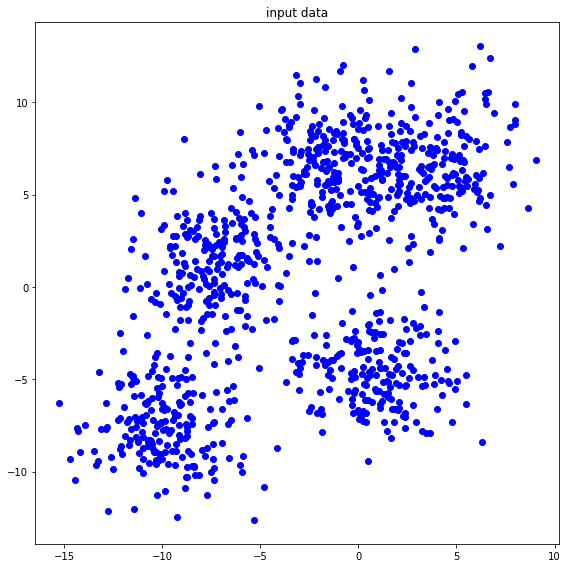

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [11]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #





    distance = np.sqrt(np.sum(np.square(feature - center),axis=1))



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [112]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    c_k = feature[label_feature==label].shape[0]

    
    centroid = np.divide(np.sum(feature[label_feature==label],axis=0),c_k)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [60]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    n = distance.shape[0]

    label_feature=np.zeros((n,))
    for i in range(n):
        label_feature[i]= distance[i,:].argmin()
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


In [75]:
distance=np.array([[1,2],[4,3],[6,5]])
compute_label(distance)

array([0., 1., 1.])

## the number of clusters $K = 2$

In [202]:
number_cluster          = 2
number_iteration        = 1000     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [203]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

def loss(distance, number_cluster,label_feature):
    loss=0
    for i in range(number_cluster):
        loss = loss + np.sum(distance[label_feature==i][:,i])
    return loss


for i in range(number_iteration):
    distance_02 = np.zeros((number_data,number_cluster))
    for j in range(number_cluster):
        label = j
        if feature[label_feature_02==label].shape[0] == 0 :
            center = centroid_iteration_02[i-1,j,:]
        else:
            center = compute_centroid(feature, label_feature_02, label)
        distance_02[:,j] = compute_distance(feature, center)
        centroid_iteration_02[i,j,:] = center
        
    
    label_feature_02 = compute_label(distance_02)
    loss_iteration_02[i] = loss(distance_02,number_cluster,label_feature_02)





        
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [204]:
label_feature_02

array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1.

In [205]:
number_cluster          = 4
number_iteration        = 1000     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [206]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


def loss(distance, number_cluster,label_feature):
    loss=0
    for i in range(number_cluster):
        loss = loss + np.sum(distance[label_feature==i][:,i])
    return loss

for i in range(number_iteration):
    distance_04 = np.zeros((number_data,number_cluster))
    for j in range(number_cluster):
        label = j
        if feature[label_feature_04==label].shape[0] == 0 :
            center = centroid_iteration_04[i-1,j,:]
        else:
            center = compute_centroid(feature, label_feature_04, label)
        distance_04[:,j] = compute_distance(feature, center)
        centroid_iteration_04[i,j,:] = center
    
    label_feature_04 = compute_label(distance_04)
    loss_iteration_04[i] = loss(distance_04, number_cluster,label_feature_04)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

In [207]:
label_feature_04

array([0., 2., 2., 0., 1., 3., 2., 0., 0., 1., 3., 1., 0., 1., 0., 2., 1.,
       1., 2., 1., 1., 0., 0., 3., 2., 2., 1., 0., 0., 2., 2., 0., 0., 0.,
       2., 1., 2., 2., 2., 0., 2., 0., 1., 3., 1., 0., 0., 3., 0., 3., 3.,
       3., 0., 1., 0., 1., 3., 2., 3., 2., 3., 3., 1., 0., 3., 2., 3., 0.,
       3., 0., 0., 1., 0., 0., 3., 1., 1., 0., 2., 1., 0., 0., 3., 2., 2.,
       3., 1., 3., 1., 0., 0., 0., 0., 3., 0., 2., 0., 0., 0., 3., 0., 1.,
       0., 0., 0., 0., 1., 1., 2., 0., 1., 1., 1., 2., 2., 0., 0., 0., 2.,
       3., 2., 2., 0., 2., 0., 1., 2., 0., 2., 2., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 2., 1., 0., 0., 2., 3., 0., 1., 3., 3., 3., 1., 0., 0.,
       0., 3., 1., 0., 0., 1., 0., 0., 1., 0., 2., 3., 3., 3., 1., 2., 0.,
       3., 2., 0., 2., 2., 0., 0., 3., 2., 0., 1., 2., 3., 0., 3., 0., 2.,
       0., 3., 0., 1., 0., 0., 2., 0., 0., 1., 2., 3., 3., 0., 0., 0., 3.,
       1., 0., 3., 0., 3., 0., 1., 2., 2., 2., 0., 1., 0., 1., 1., 0., 2.,
       0., 1., 1., 2., 0.

## the number of clusters $K = 8$

In [208]:
number_cluster          = 8
number_iteration        = 1000     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [209]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

def loss(distance, number_cluster,label_feature):
    loss=0
    for i in range(number_cluster):
        loss = loss + np.sum(distance[label_feature==i][:,i])
    return loss


for i in range(number_iteration):
    distance_08 = np.zeros((number_data,number_cluster))
    for j in range(number_cluster):
        label = j
        if feature[label_feature_08==label].shape[0] == 0 :
            center = centroid_iteration_08[i-1,j,:]
        else:
            center = compute_centroid(feature, label_feature_08, label)
        distance_08[:,j] = compute_distance(feature, center)
        centroid_iteration_08[i,j,:] = center
    
    label_feature_08 = compute_label(distance_08)
    loss_iteration_08[i] = loss(distance_08, number_cluster,label_feature_08)


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

In [210]:
label_feature_08

array([6., 5., 5., 1., 2., 0., 5., 7., 3., 4., 0., 3., 1., 4., 1., 5., 3.,
       4., 5., 3., 4., 7., 6., 0., 5., 5., 2., 6., 7., 5., 1., 7., 7., 7.,
       5., 2., 5., 5., 2., 7., 5., 7., 3., 0., 4., 7., 7., 0., 1., 0., 0.,
       0., 1., 4., 7., 4., 0., 5., 0., 5., 0., 0., 4., 7., 0., 5., 0., 7.,
       0., 7., 6., 4., 1., 7., 0., 3., 3., 1., 1., 4., 7., 7., 0., 6., 5.,
       0., 3., 2., 4., 7., 1., 1., 7., 0., 7., 5., 7., 7., 7., 0., 6., 4.,
       7., 7., 6., 6., 3., 3., 5., 7., 3., 4., 2., 5., 5., 7., 7., 7., 5.,
       0., 5., 6., 6., 6., 7., 4., 5., 1., 5., 5., 7., 7., 2., 3., 4., 1.,
       4., 1., 1., 5., 3., 7., 1., 2., 0., 7., 4., 0., 2., 0., 4., 7., 1.,
       6., 0., 4., 1., 7., 4., 7., 1., 3., 6., 5., 0., 0., 0., 2., 5., 6.,
       0., 5., 1., 6., 5., 1., 6., 0., 5., 1., 4., 5., 0., 1., 0., 7., 5.,
       6., 0., 7., 4., 7., 7., 1., 6., 7., 2., 6., 0., 0., 7., 7., 1., 0.,
       4., 7., 0., 1., 0., 1., 3., 5., 5., 6., 7., 4., 7., 3., 4., 7., 5.,
       7., 4., 3., 6., 7.

## the number of clusters $K = 16$

In [211]:
number_cluster          = 16
number_iteration        = 1000     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [212]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
def loss(distance, number_cluster,label_feature):
    loss=0
    for i in range(number_cluster):
        loss = loss + np.sum(distance[label_feature==i][:,i])
    return loss


for i in range(number_iteration):
    distance_16 = np.zeros((number_data,number_cluster))
    for j in range(number_cluster):
        label = j
        if feature[label_feature_16==label].shape[0] == 0 :
            center = centroid_iteration_16[i-1,j,:]
        else:
            center = compute_centroid(feature, label_feature_16, label)
        distance_16[:,j] = compute_distance(feature, center)
        centroid_iteration_16[i,j,:] = center
    
    label_feature_16 = compute_label(distance_16)
    loss_iteration_16[i] = loss(distance_16, number_cluster,label_feature_16)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

In [213]:
label_feature_16

array([ 5.,  6., 10.,  5.,  9.,  3.,  8.,  2., 14., 11., 12.,  1.,  5.,
       11.,  5., 15.,  1.,  9., 10.,  1., 11.,  2.,  0., 13., 10.,  6.,
        9.,  0., 14., 10.,  5., 14., 14.,  4., 10.,  9., 10., 10.,  8.,
        4., 10., 14.,  1., 13., 11., 14., 14., 13.,  2., 12., 12., 12.,
        5.,  7., 14., 11.,  3., 10.,  3.,  6.,  3., 12., 11., 14.,  3.,
       10., 13., 14., 12., 14.,  0., 11.,  2.,  4., 13.,  7.,  1.,  5.,
        6.,  7.,  4.,  4., 13., 15., 10.,  3.,  1.,  9.,  9., 14.,  5.,
        5.,  2., 12., 14., 10.,  4., 14., 14., 12.,  5., 11., 14., 14.,
        0.,  0.,  1.,  1., 15.,  4.,  1.,  9.,  9., 10., 10., 14.,  4.,
       14.,  8., 12.,  8.,  0.,  0.,  6.,  4., 11.,  8.,  5., 10.,  6.,
        2., 14.,  9.,  1.,  7.,  5., 11.,  2.,  2., 15.,  1.,  4.,  2.,
        8., 13.,  4., 11.,  3., 13., 13., 11.,  2.,  2.,  0.,  3., 11.,
        5.,  4.,  7., 14.,  5.,  1.,  0., 15.,  3.,  3.,  3.,  9., 10.,
        0.,  3., 15.,  2., 15., 10.,  2.,  5., 13., 10.,  5., 11

---

---

## functions for presenting the results

---

---

In [215]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [216]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [217]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [218]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [219]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [220]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [221]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [222]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [269]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # cluster_0_center_x = centroid_iteration_02[:,0,0]
    # cluster_0_center_y = centroid_iteration_02[:,0,1]

    # cluster_1_center_x = centroid_iteration_02[:,1,0]
    # cluster_1_center_y = centroid_iteration_02[:,1,1]

    # cluster_0_center_x_initial = centroid_iteration_02[0,0,0]
    # cluster_0_center_y_initial = centroid_iteration_02[0,0,1]

    # cluster_0_center_x_final = centroid_iteration_02[-1,0,0]
    # cluster_0_center_y_final = centroid_iteration_02[-1,0,1]

    # cluster_1_center_x_initial = centroid_iteration_02[0,1,0]
    # cluster_1_center_y_initial = centroid_iteration_02[0,1,1]
    
    # cluster_1_center_x_final = centroid_iteration_02[-1,1,0]
    # cluster_1_center_y_final = centroid_iteration_02[-1,1,1]


    
    # plt.plot(cluster_0_center_x, cluster_0_center_y, '-', color='blue', label='cluster = 0')
    # plt.plot(cluster_1_center_x, cluster_1_center_y, '-', color='yellow', label='cluster = 1')
    # plt.plot(cluster_0_center_x_initial,cluster_0_center_y_initial,'o', color='magenta', label='initial')
    # plt.plot(cluster_0_center_x_final,cluster_0_center_y_final,'o', color='red', label='final')
    # plt.plot(cluster_1_center_x_initial,cluster_1_center_y_initial,'o', color='magenta')
    # plt.plot(cluster_1_center_x_final,cluster_1_center_y_final,'o', color='red')

    # plt.plot(cluster_0_center_x, cluster_0_center_y, '-', color='blue', label='cluster = 0')
    # plt.plot(cluster_1_center_x, cluster_1_center_y, '-', color='yellow', label='cluster = 1')
    # plt.plot(cluster_0_center_x_initial,cluster_0_center_y_initial,'o', color='magenta', label='initial')
    # plt.plot(cluster_0_center_x_final,cluster_0_center_y_final,'o', color='red', label='final')
    # plt.plot(cluster_1_center_x_initial,cluster_1_center_y_initial,'o', color='magenta')
    # plt.plot(cluster_1_center_x_final,cluster_1_center_y_final,'o', color='red')



    for i in range(2):
        plt.plot(centroid_iteration_02[:,i,0], centroid_iteration_02[:,i,1], '-', color=colornames[i+30], label='cluster = {}'.format(i))
        plt.plot(centroid_iteration_02[0,i,0],centroid_iteration_02[0,i,1],'o', color=colornames[20])
        plt.plot(centroid_iteration_02[-1,i,0],centroid_iteration_02[-1,i,1],'o', color=colornames[21])
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

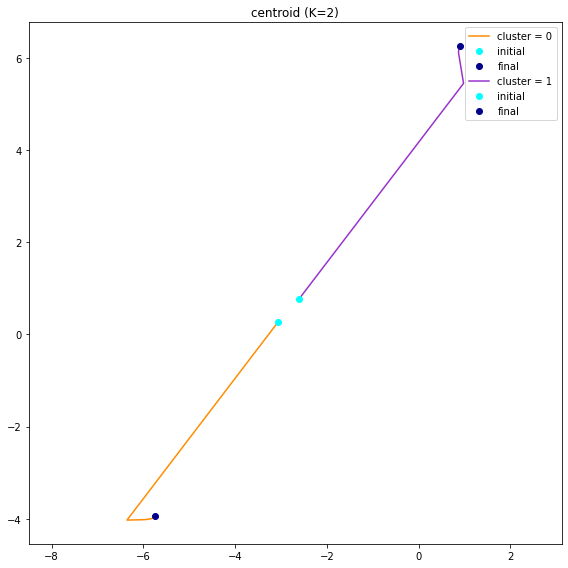

In [252]:
function_result_09()

In [268]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(4):
        plt.plot(centroid_iteration_04[:,i,0], centroid_iteration_04[:,i,1], '-', color=colornames[i+30], label='cluster = {}'.format(i))
        plt.plot(centroid_iteration_04[0,i,0],centroid_iteration_04[0,i,1],'o', color=colornames[20])
        plt.plot(centroid_iteration_04[-1,i,0],centroid_iteration_04[-1,i,1],'o', color=colornames[21])
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

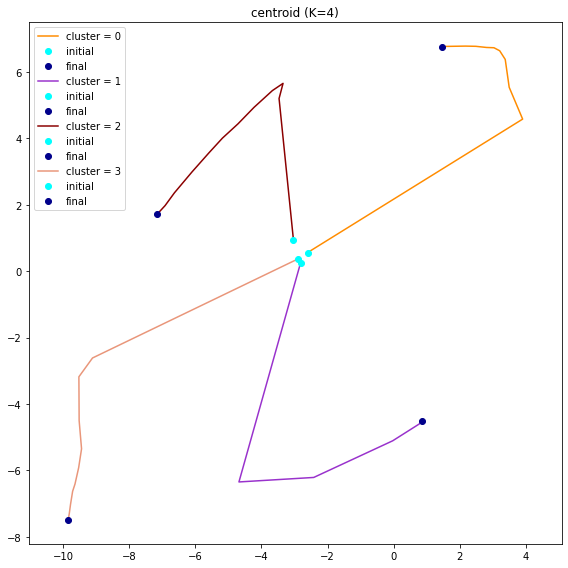

In [254]:
function_result_10()

In [267]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(8):
        plt.plot(centroid_iteration_08[:,i,0], centroid_iteration_08[:,i,1], '-', color=colornames[i+30], label='cluster = {}'.format(i))
        plt.plot(centroid_iteration_08[0,i,0],centroid_iteration_08[0,i,1],'o', color=colornames[20])
        plt.plot(centroid_iteration_08[-1,i,0],centroid_iteration_08[-1,i,1],'o', color=colornames[21])
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

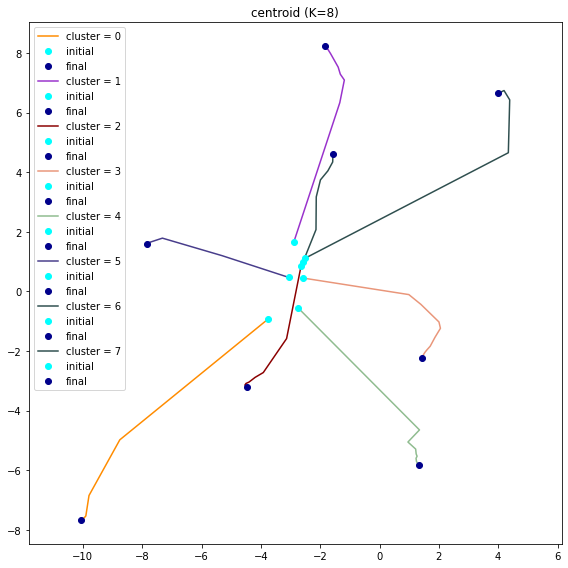

In [262]:
function_result_11()

In [265]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(16):
        plt.plot(centroid_iteration_16[:,i,0], centroid_iteration_16[:,i,1], '-', color=colornames[i+30], label='cluster = {}'.format(i))
        plt.plot(centroid_iteration_16[0,i,0],centroid_iteration_16[0,i,1],'o', color=colornames[20])
        plt.plot(centroid_iteration_16[-1,i,0],centroid_iteration_16[-1,i,1],'o', color=colornames[21])
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

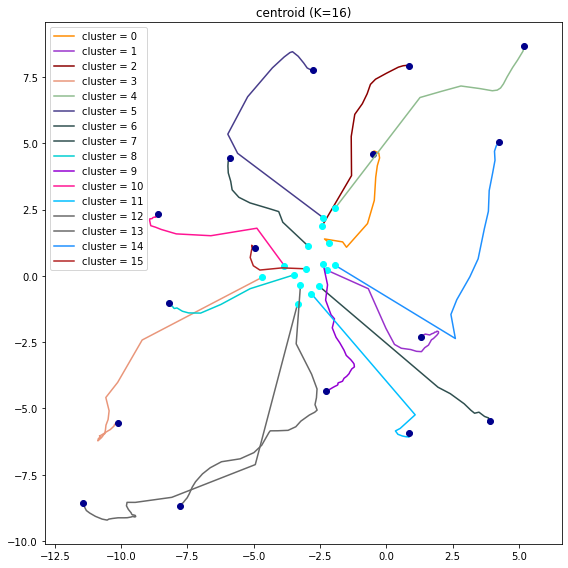

In [266]:
function_result_12()

In [272]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(2):
        plt.plot(x[label_feature_02==i],y[label_feature_02==i],'o',color=colornames[i+20], label='cluster = {}'.format(i))
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

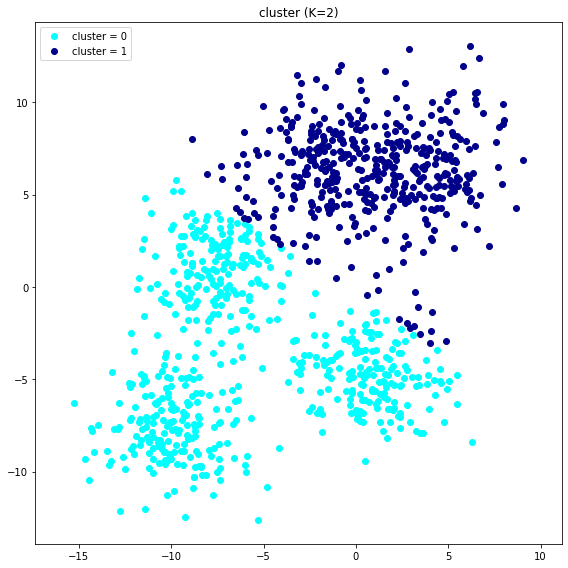

In [273]:
function_result_13()

In [274]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(4):
        plt.plot(x[label_feature_04==i],y[label_feature_04==i],'o',color=colornames[i+20], label='cluster = {}'.format(i))
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [275]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(8):
        plt.plot(x[label_feature_08==i],y[label_feature_08==i],'o',color=colornames[i+20], label='cluster = {}'.format(i))
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 33.6706661721
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 23.6987403172
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  8.7648680353
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) = 11.3765801786
**************************************************
## [RESULT 05]
**************************************************


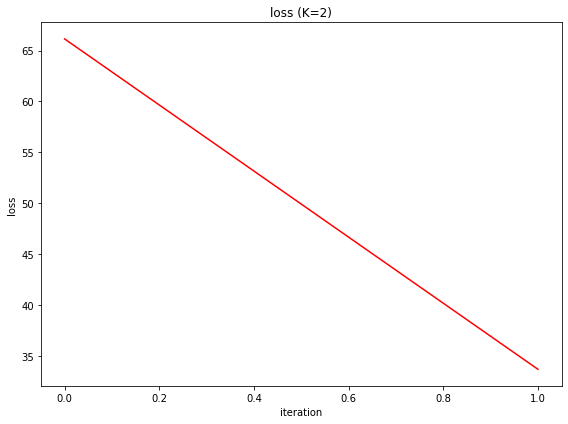

**************************************************
## [RESULT 06]
**************************************************


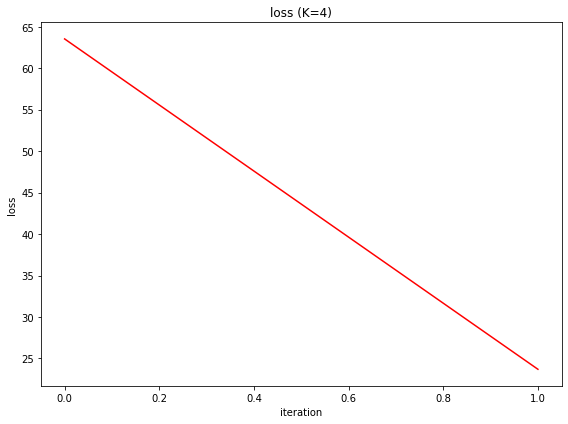

**************************************************
## [RESULT 07]
**************************************************


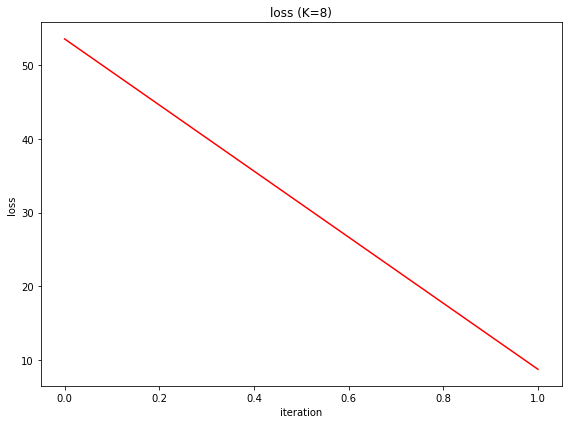

**************************************************
## [RESULT 08]
**************************************************


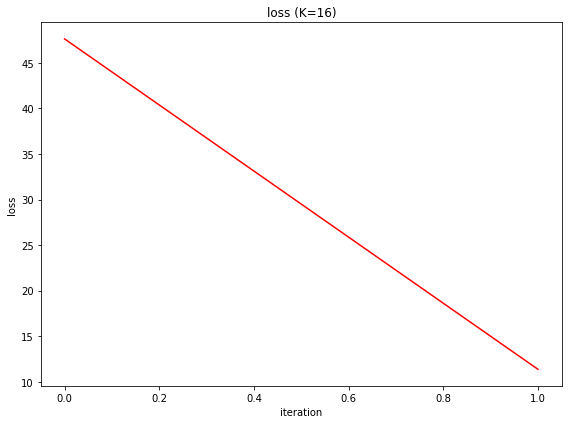

**************************************************
## [RESULT 09]
**************************************************


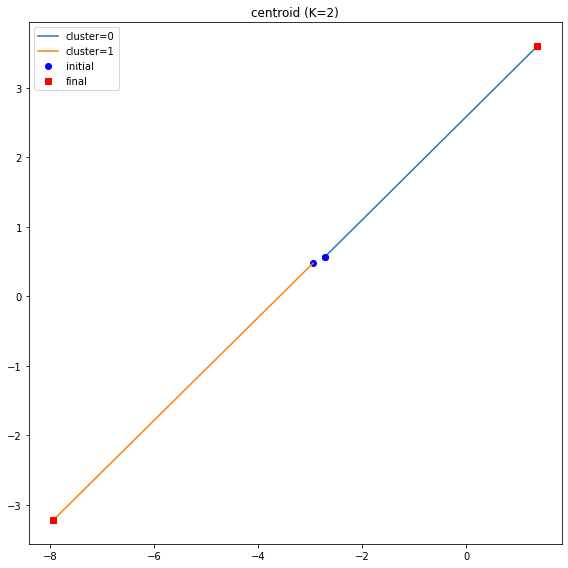

**************************************************
## [RESULT 10]
**************************************************


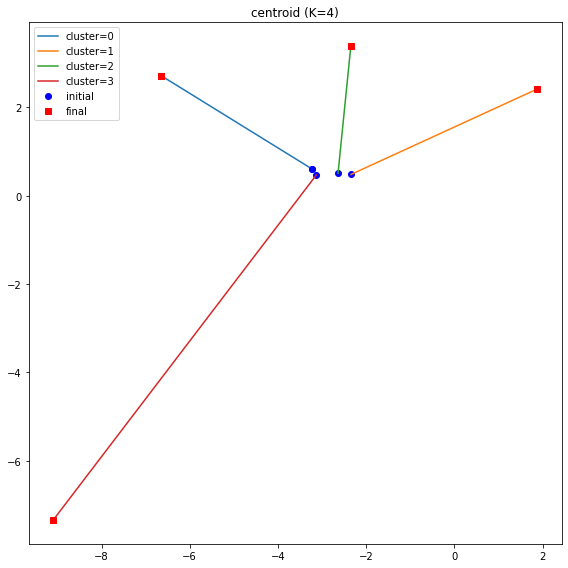

**************************************************
## [RESULT 11]
**************************************************


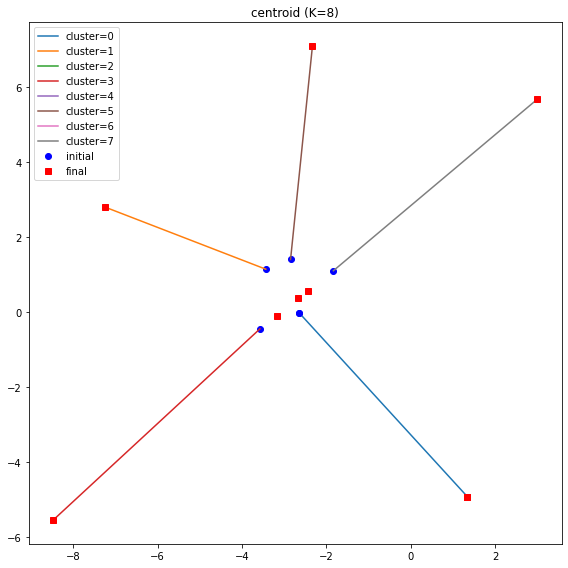

**************************************************
## [RESULT 12]
**************************************************


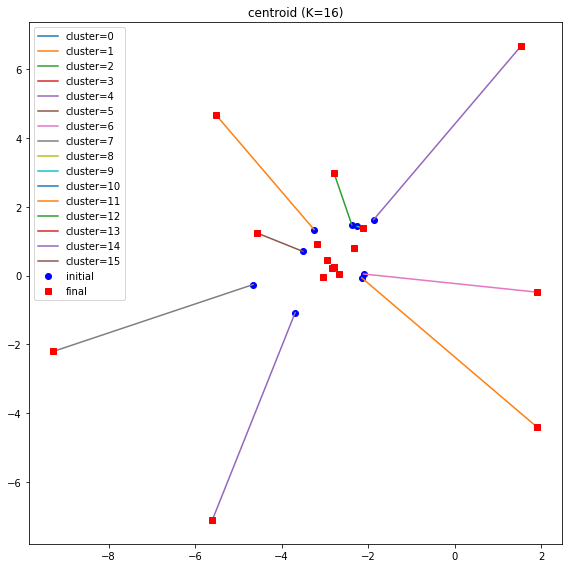

**************************************************
## [RESULT 13]
**************************************************


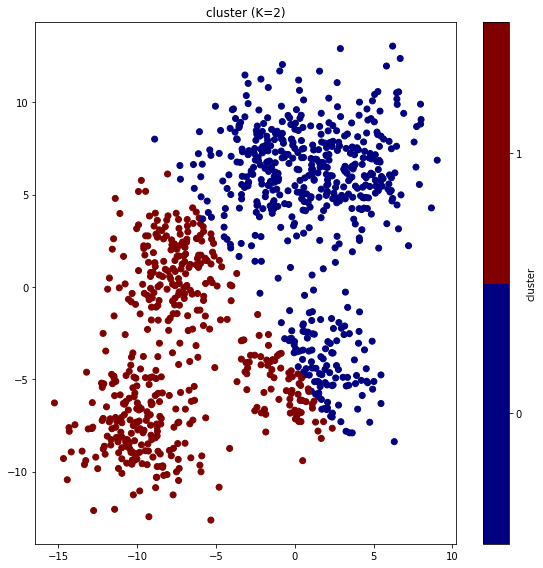

**************************************************
## [RESULT 14]
**************************************************


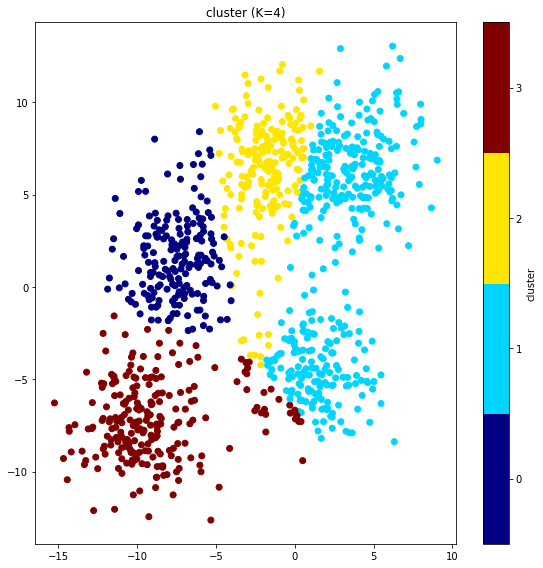

**************************************************
## [RESULT 15]
**************************************************


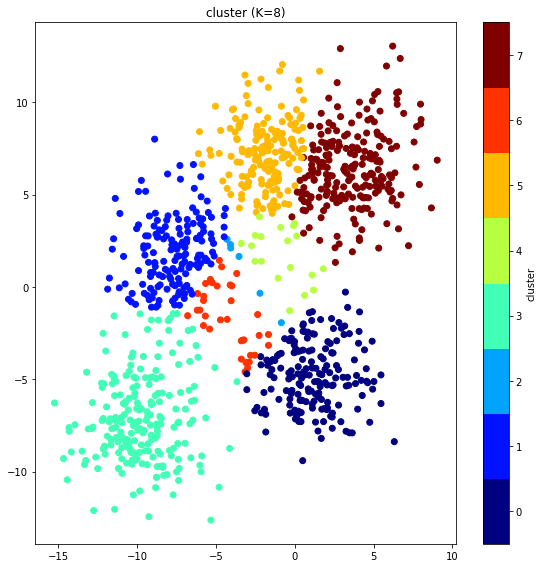

**************************************************
## [RESULT 16]
**************************************************


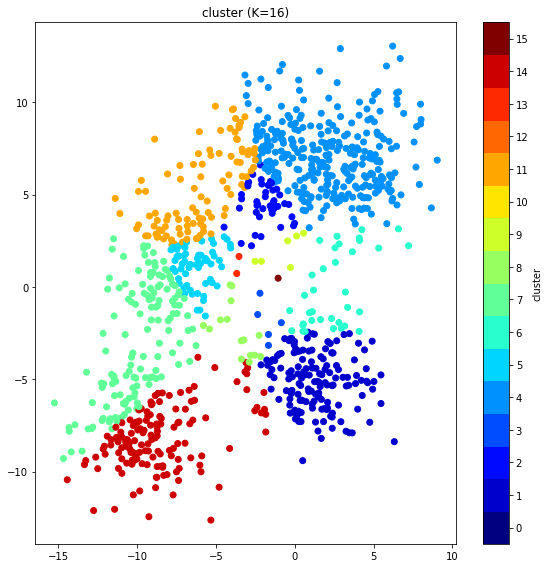

In [31]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)